# Final Integrated CA

College: `CCT College Dublin`

Programme Title: `BSc (Hons) in Computing and IT Y4`

Module Title: `Artificial Intelligence` / `Data Visualisation & Comms`

Lecturer Name: `David McQuaid` / `Sam Weiss`

Student Name: `Marcos Vinicius de Oliveira`

Student Number: `2023323`

# Artificial Intelligence Tasks
## Constraint Satisfaction Problem

### Scenario 1:

In [24]:

from itertools import combinations

# Candidates and their abilities
candidates_scenario_1 = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
    "Ciara": ["Python"]  # Ciara knows Python
}

# Required roles
required_roles_scenario_1 = {
    "Python": 1,  # One Python role is already filled by Ciara
    "AI": 2,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# Function to check if the combination of hires covers all roles
def covers_all_roles(hires):
    covered_roles = {role: 0 for role in required_roles_scenario_1.keys()}

    for hire in hires:
        for skill in candidates_scenario_1[hire]:
            if skill in covered_roles:
                covered_roles[skill] += 1

    # Check if all roles are adequately covered
    return all(covered_roles[role] >= required_roles_scenario_1[role] for role in covered_roles)

# Generate combinations of three hires (excluding Ciara who is a given hire)
possible_hires = set(candidates_scenario_1.keys()) - {"Ciara"}
combinations_of_hires = combinations(possible_hires, 3)

# Find valid combinations
valid_combinations = []
for hires in combinations_of_hires:
    hires_with_ciara = hires + ("Ciara",)  # Adding Ciara to the combination
    if covers_all_roles(hires_with_ciara):
        valid_combinations.append(hires_with_ciara)

# Display the first few valid combinations
valid_combinations[:5]  # Display the first 5 solutions for brevity

[('Juan', 'Jim', 'Jane', 'Ciara'), ('Anita', 'Jim', 'Jane', 'Ciara')]

### Scenario 2

In [25]:
from itertools import combinations

# Excluding Ciara and Juan
candidates_scenario_2 = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# Roles for Scenario 2
required_roles_scenario_2 = {
    "Python": 2,
    "AI": 3,  # Increased to 3 AI Engineers
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# Function to check if the combination of hires covers all roles for Scenario 2
def covers_all_roles_scenario_2(hires):
    covered_roles = {role: 0 for role in required_roles_scenario_2.keys()}

    for hire in hires:
        for skill in candidates_scenario_2.get(hire, []):
            if skill in covered_roles:
                covered_roles[skill] += 1

    # Check if all roles are adequately covered
    return all(covered_roles[role] >= required_roles_scenario_2[role] for role in covered_roles)

# Generate combinations of four hires for Scenario 2
combinations_of_hires_scenario_2 = combinations(candidates_scenario_2.keys(), 4)

# Find valid combinations for Scenario 2
valid_combinations_scenario_2 = []
for hires in combinations_of_hires_scenario_2:
    hires_with_partners = hires + ("Ciara", "Juan")  # Adding Ciara and Juan to the combination
    if covers_all_roles_scenario_2(hires_with_partners):
        valid_combinations_scenario_2.append(hires_with_partners)

# Display the first few valid combinations
valid_combinations_scenario_2[:5]  # Display the first 5 solutions


[('Peter', 'Jim', 'Jane', 'Anita', 'Ciara', 'Juan')]

## Depth First Search (DFS)

### Scenario 1

In [26]:
def dfs_roles_assignment(candidates, required_roles, current_assignment=[], current_depth=0, max_depth=3):
    # If maximum depth is reached, check if the current assignment satisfies all roles
    if current_depth == max_depth:
        if all(required_roles[role] == 0 for role in required_roles):
            return [current_assignment]
        else:
            return []

    # If any role requirement becomes negative, the path is invalid
    if any(required_roles[role] < 0 for role in required_roles):
        return []

    valid_assignments = []
    for candidate in candidates:
        # Skip if candidate is already in the current assignment
        if candidate in current_assignment:
            continue

        # Update the roles requirements based on the candidate's skills
        updated_roles = required_roles.copy()
        for skill in candidates[candidate]:
            if skill in updated_roles:
                updated_roles[skill] -= 1

        # Recurse with the updated assignment and roles
        new_assignment = current_assignment + [candidate]
        assignments = dfs_roles_assignment(
            candidates, updated_roles, new_assignment, current_depth + 1, max_depth
        )

        valid_assignments.extend(assignments)

    return valid_assignments

# Scenario 1 requirements
candidates_scenario_1 = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
    # Note: Ciara is not included as she is already assigned to a Python role
}

required_roles_scenario_1 = {
    "Python": 1,  # One Python role is already filled by Ciara
    "AI": 2,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# Find valid assignments using DFS
dfs_valid_assignments = dfs_roles_assignment(candidates_scenario_1, required_roles_scenario_1)
dfs_valid_assignments[:5]  # Display the first 5 solutions for brevity

[['Juan', 'Jim', 'Jane'],
 ['Juan', 'Jane', 'Jim'],
 ['Jim', 'Juan', 'Jane'],
 ['Jim', 'Jane', 'Juan'],
 ['Jim', 'Jane', 'Anita']]

### Scenario 2

In [27]:
def dfs_roles_assignment_scenario_2(candidates, required_roles, current_assignment=[], current_depth=0, max_depth=4):
    # If maximum depth is reached, check if the current assignment satisfies all roles
    if current_depth == max_depth:
        if all(required_roles[role] == 0 for role in required_roles):
            return [current_assignment]
        else:
            return []

    # If any role requirement becomes negative, the path is invalid
    if any(required_roles[role] < 0 for role in required_roles):
        return []

    valid_assignments = []
    for candidate in candidates:
        # Skip if candidate is already in the current assignment or is a partner (Ciara or Juan)
        if candidate in current_assignment or candidate in ["Ciara", "Juan"]:
            continue

        # Update the roles requirements based on the candidate's skills
        updated_roles = required_roles.copy()
        for skill in candidates[candidate]:
            if skill in updated_roles:
                updated_roles[skill] -= 1

        # Recurse with the updated assignment and roles
        new_assignment = current_assignment + [candidate]
        assignments = dfs_roles_assignment_scenario_2(
            candidates, updated_roles, new_assignment, current_depth + 1, max_depth
        )

        valid_assignments.extend(assignments)

    return valid_assignments

# Scenario 2 requirements
candidates_scenario_2 = candidates  # Including all candidates

required_roles_scenario_2 = {
    "Python": 2,  # Two Python roles
    "AI": 3,      # Three AI Engineers
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# Find valid assignments using DFS for Scenario 2
dfs_valid_assignments_scenario_2 = dfs_roles_assignment_scenario_2(candidates_scenario_2, required_roles_scenario_2)
dfs_valid_assignments_scenario_2[:5]  # Display the first 5 solutions for brevity

[['Peter', 'Jim', 'Jane', 'Anita'],
 ['Peter', 'Jim', 'Anita', 'Jane'],
 ['Peter', 'Jane', 'Jim', 'Anita'],
 ['Peter', 'Jane', 'Anita', 'Jim'],
 ['Peter', 'Anita', 'Jim', 'Jane']]

# Data Visualisation Tasks
## CSP Visualisations

### Candidates and roles

In [28]:
# Please install these packages if you dont have it yet

# !pip install networkx
# !pip install matplotlib

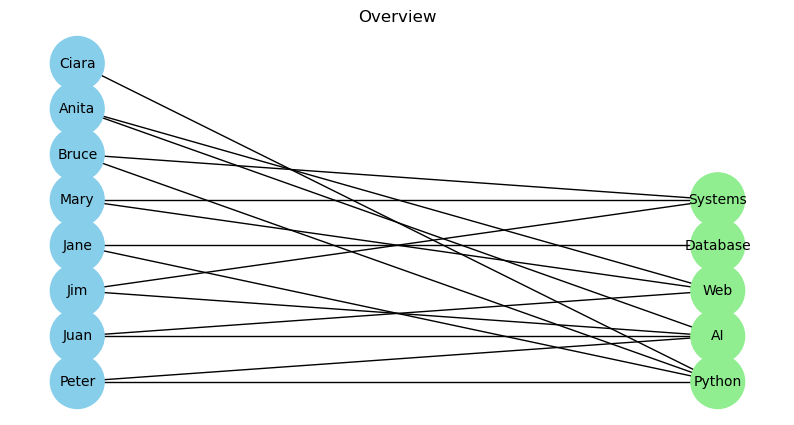

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# Candidates and roles overview
candidates_scenario = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
    "Ciara": ["Python"]
}

roles_scenario = ["Python", "AI", "Web", "Database", "Systems"]

def visualize_csp(candidates, roles, scenario_title):
    G = nx.Graph()

    # Add nodes for each candidate and role
    for candidate in candidates:
        G.add_node(candidate, type='candidate', bipartite=0)
    for role in roles:
        G.add_node(role, type='role', bipartite=1)

    # Add edges between candidates and roles
    for candidate, skills in candidates.items():
        for skill in skills:
            if skill in roles:
                G.add_edge(candidate, skill)

    # Separate positions for candidates and roles
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(candidates))
    pos.update((node, (2, index)) for index, node in enumerate(roles))

    # Draw the graph
    plt.figure(figsize=(10, 5))
    plt.title(scenario_title)
    nx.draw(G, pos, with_labels=True, 
            node_color=['skyblue' if G.nodes[node]['type'] == 'candidate' else 'lightgreen' for node in G],
            node_size=1500,
            font_size=10)
    plt.show()


visualize_csp(candidates_scenario, roles_scenario, "Overview")

### Scenario 1 and 2

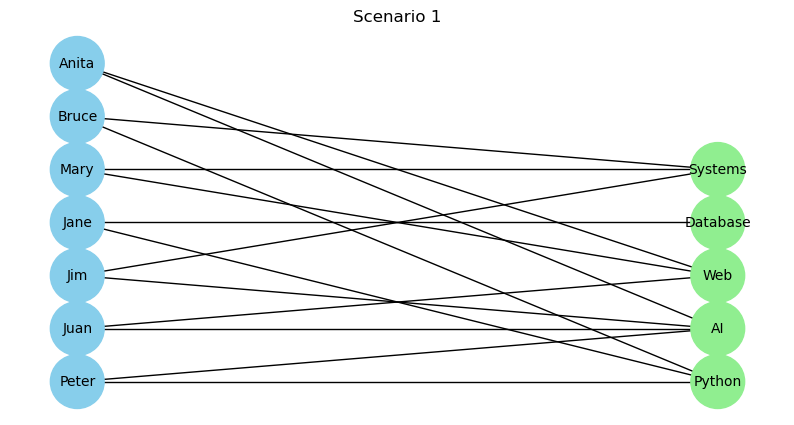

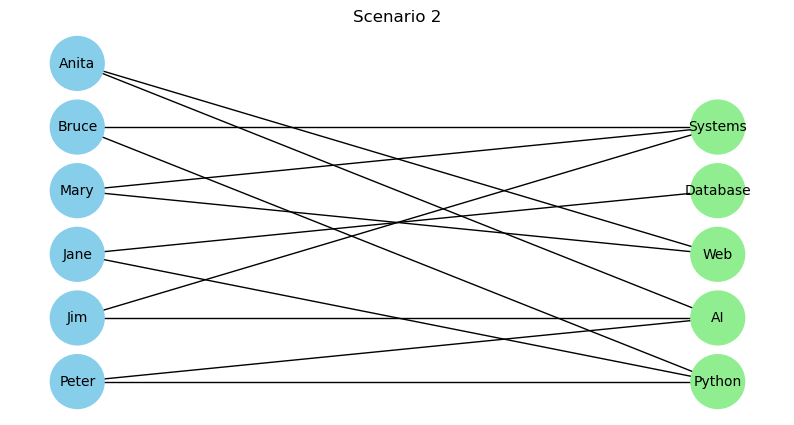

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

# Candidates and their abilities of Scenario 1
candidates_scenario_1 = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
    # Ciara knows Python
}

# Required roles
required_roles_scenario_1 = {
    "Python": 2,
    "AI": 2,
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

# Candidates and their abilities of Scenario 2
candidates_scenario_2 = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
    # Excluding Ciara and Juan
}

# Roles for Scenario 2
required_roles_scenario_2 = {
    "Python": 2,
    "AI": 3,  # Increased to 3 AI Engineers
    "Web": 1,
    "Database": 1,
    "Systems": 1
}

def visualize_scenario(candidates_scenario_1, required_roles_scenario_1, scenario_title):
    # Initialize a new graph
    G = nx.Graph()

    # Add nodes for candidates and roles
    for candidate, skills in candidates_scenario_1.items():
        G.add_node(candidate, type='candidate', bipartite=0)
        for skill in skills:
            if skill in required_roles_scenario_1:
                # Add the role node if it has not already been added
                if skill not in G:
                    G.add_node(skill, type='role', bipartite=1)
                # Add an edge between the candidate and the role
                G.add_edge(candidate, skill)

    # Generate positions for visualization (left for candidates, right for roles)
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(candidates_scenario_1))
    pos.update((node, (2, i)) for i, node in enumerate(required_roles_scenario_1))

    # Draw the graph
    plt.figure(figsize=(10, 5))
    plt.title(scenario_title)
    nx.draw(G, pos, with_labels=True, 
            node_color=['skyblue' if G.nodes[node]['type'] == 'candidate' else 'lightgreen' for node in G],
            node_size=1500,
            font_size=10)
    plt.show()

# Scenario 1
visualize_scenario(candidates_scenario_1, required_roles_scenario_1, "Scenario 1")

# Scenario 2
visualize_scenario(candidates_scenario_2, required_roles_scenario_2, "Scenario 2")